In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train_ready_for_model.csv")
train.drop(columns='Source',inplace=True)

In [3]:
test = pd.read_csv("test_ready_for_model.csv")
test.drop(columns='Source',inplace=True)

In [4]:
cmp = pd.read_csv("solution.csv")
cmp.rename(columns={'x1':'VehicleID','y':'Price_Actual'}, inplace=True) 
cmp.head()

,VehicleID,Price_Actual
0,60001,9800
1,60002,2500
2,60003,17999
3,60004,7550
4,60005,2500


In [5]:
#Define target and ID columns:
target = 'Price'
IDcol = ['VehicleID']
from sklearn import model_selection, metrics, cross_validation
import time

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    cmp = pd.read_csv("solution.csv")
    cmp.rename(columns={'x1':'VehicleID','y':'Price_Actual'}, inplace=True) 
    cmp.head()
    t1=time.time()
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=10,verbose=1, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("CV score",cv_score)
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print("\nTrain MAPE : %.4g" % np.mean(np.abs((dtrain[target].values - dtrain_predictions)/dtrain[target].values)) * 100)
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    dtest[target]=dtest[target].round()
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    cmp=pd.merge(cmp,submission,how='left',on=['VehicleID'])
    print("\nTest MAPE : %.4g" % np.mean(np.abs((cmp.Price_Actual.values - cmp.Price.values)/cmp.Price_Actual.values)) * 100)
    submission.to_csv(filename, index=False)
    cmp.to_csv('compare'+filename, index=False)
    t2=time.time()
    t_linalg_lstsq = float(t2-t1)
    print("Time taken: {} seconds".format(t_linalg_lstsq))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
predictors=['PowerOfTheEngine',
'Usage',
'Yeardiff',
'DistranceTravelledmod',
'DistranceTravelled_150000.0',
'ModelOfTheVehicle',
'VehicleType_Small Car',
'YearOfVehicleRegistration_2016',
'TypeOfTheFuelUsed_diesel',
'GearBoxType_manual',
'GearBoxType_automatic',
'VehicleType_cabrio',
'BrandOfTheVehicle_volkswagen',
'DaydiffAd',
'VehicleType_Combi',
'BrandOfTheVehicle_mercedes_benz',
'VehicleType_limousine',
'BrandOfTheVehicle_audi',
'BrandOfTheVehicle_bmw',
'TypeOfTheFuelUsed_petrol',
'YearOfVehicleRegistration_2008',
'VehicleType_bus',
'YearOfVehicleRegistration_2010',
'BrandOfTheVehicle_opel',
'YearOfVehicleRegistration_2011',
'YearOfVehicleRegistration_2005',
'VehicleType_suv',
'BrandOfTheVehicle_ford',
'DistranceTravelled_125000.0',
'YearOfVehicleRegistration_2006',
'YearOfVehicleRegistration_2007',
'IsDamageRepaired_Yes',
'PowerOfTheEnginecat_normal',
'YearOfVehicleRegistration_2012',
'PowerOfTheEnginecat_high',
'BrandOfTheVehicle_mini',
'IsDamageRepaired_No',
'YearOfVehicleRegistration_2009',
'YearOfVehicleRegistration_2013',
'YearOfVehicleRegistration_2004',
'YearOfVehicleRegistration_2003',
'YearOfVehicleRegistration_2015',
'YearOfVehicleRegistration_2002',
'PowerOfTheEnginecat_medium',
'YearOfVehicleRegistration_2000',
'BrandOfTheVehicle_renault',
'YearOfVehicleRegistration_2014',
'PowerOfTheEnginecat_low',
'YearOfVehicleRegistration_2001',
'VehicleType_coupe',
'BrandOfTheVehicle_peugeot',
'MonthOfVehicleRegistration_1',
'DistranceTravelled_80000.0']

In [28]:
from sklearn.ensemble import RandomForestRegressor
#predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = RandomForestRegressor(n_estimators=100,max_depth=10, min_samples_leaf=2,verbose=1,n_jobs=-1)
modelfit(alg1, train, test, predictors, target, IDcol, 'res8.csv')
#coef1 = pd.Series(alg1.coef_, predictors).sort_values()
#coef1.plot(kind='bar', title='Model Coefficients')

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.5s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.2s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jo


Model Report
CV score [2520.79416723 2580.79143165 2473.52022344 2481.14429895 2513.64710097
 2628.70190211 2582.48385668 2567.76008894 2425.38449663 2488.4882273 ]
RMSE : 2223

Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Train MAPE : 0.276
Trai

In [29]:
from sklearn.ensemble import AdaBoostRegressor
#predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = AdaBoostRegressor(n_estimators=10)
modelfit(alg1, train, test, predictors, target, IDcol, 'ADB.csv')
#coef1 = pd.Series(alg1.coef_, predictors).sort_values()
#coef1.plot(kind='bar', title='Model Coefficients')

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   20.6s finished



Model Report
CV score [3886.17107265 3895.45058504 3824.11937555 3806.85344399 3780.61269245
 3820.58175127 3929.46738279 3839.42171236 3735.12653874 3849.8857921 ]
RMSE : 3831

Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
Train MAPE : 0.7729
T

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.2s finished



Model Report
CV score [3359.48698624 3477.82499062 3356.73796458 3365.90949128 3336.80621166
 3475.71405184 3384.92428167 3434.99951915 3318.71986562 3442.83325724]
RMSE : 3391

Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
T

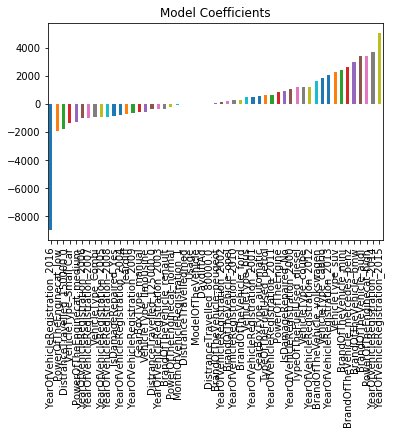

In [30]:
from sklearn.linear_model import LinearRegression
#predictors = [x for x in train.columns if x not in [target]+IDcol]
#print("predictors : ",predictors)
# print predictors
alg1 = LinearRegression(normalize=False)
modelfit(alg1, train, test, predictors, target, IDcol, 'Linreg.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished



Model Report
CV score [3359.46766993 3477.84460206 3356.76062324 3365.85272378 3336.80553007
 3475.67179996 3384.89376299 3435.04359128 3318.76828623 3442.80911704]
RMSE : 3391

Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
Train MAPE : 0.4681
T

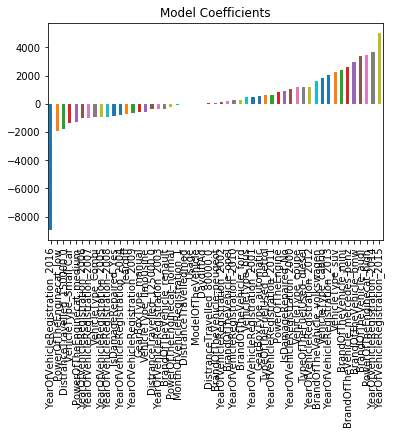

In [32]:
from sklearn.linear_model import Ridge
#predictors = [x for x in train.columns if x not in [target]+IDcol]
#print("predictors : ",predictors)
# print predictors
alg1 = Ridge(alpha = 0.9,normalize=False)
modelfit(alg1, train, test, predictors, target, IDcol, 'res3.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   13.9s finished



Model Report
CV score [3565.96841815 3705.26231523 3569.96628609 3574.42682902 3565.98990261
 3700.6209216  3612.33104679 3687.23159187 3567.04229983 3672.4418465 ]
RMSE : 3637

Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Train MAPE : 0.481
Trai

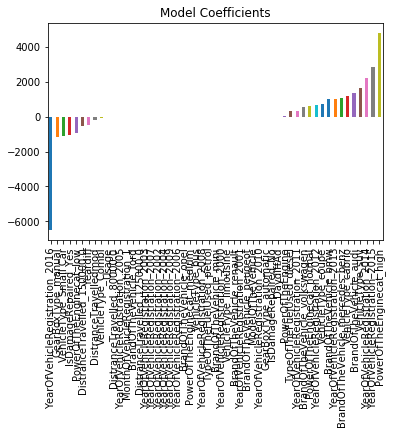

In [33]:
from sklearn.linear_model import Lasso
#predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = Lasso(alpha = 1,normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'Lasso.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   32.2s finished



Model Report
CV score [3359.44975425 3477.79116505 3356.65792386 3365.88196645 3336.8531205
 3475.73014817 3384.89795686 3435.0198786  3318.79934707 3442.84951205]
RMSE : 3391

Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train MAPE : 0.468
Train

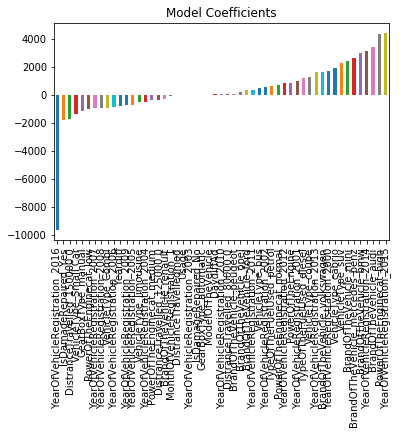

In [45]:
from sklearn.linear_model import ElasticNet
#predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = ElasticNet(alpha=0.001,l1_ratio=1,normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'res5.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [ ]:
from sklearn.ensemble import Rand
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
model = GradientBoostingRegressor()
scoring = 'mean_absolute_error'
param_dist = {
 'n_estimators': [10, 20,40,60],
    'max_depth':[5,10,15],
    'min_samples_split':[2,5,10]
 }
kfold = KFold(n_splits=5, random_state=123)
grid = GridSearchCV(estimator=model, param_grid=param_dist, scoring=scoring, cv=kfold, n_jobs=-1, verbose=2)
grid_result = grid.fit(train[predictors], train[target])


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.6min
